In [64]:
## Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas 
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')
import re
import csv
import json
import time
from scipy import stats
import numpy as np

## Analyze single samples. Code to compare two word distributions

In [3]:
topics = glob.glob('../data/sampling/*')

In [4]:
topics

['../data/sampling/climate_change',
 '../data/sampling/community_policing',
 '../data/sampling/deep_state',
 '../data/sampling/ebola',
 '../data/sampling/gun_violence',
 '../data/sampling/immigration',
 '../data/sampling/network_neutrality',
 '../data/sampling/teen_pregnancy',
 '../data/sampling/us_election',
 '../data/sampling/vaccines']

In [5]:
for t in topics:
    one_k = pandas.read_csv(glob.glob(topics[t] + '/1000/*')[0])
    ten_k = pandas.read_csv(glob.glob(topics[t] + '/10000/*')[0])
    hundred_k = pandas.read_csv(glob.glob(topics[t] + '/100000/*')[0])
    
    if (one_k.empty or ten_k.empty or hundred_k.empty):
        break
    
    # first test: How many top 100 words similar?
    
    
    # second test: Plot all three charts: Is it logarithmic?
   

TypeError: list indices must be integers or slices, not str

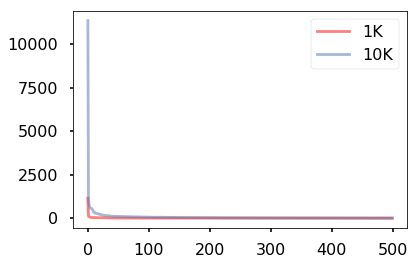

In [38]:
plt.plot(one_k['count'], alpha=0.5, label='1K', color='red')
plt.plot(ten_k['count'], alpha=0.5, label='10K')
plt.xlabel('')
plt.legend(loc='upper right')
plt.show()

/Users/Cat/Library/Python/3.6/lib/python/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


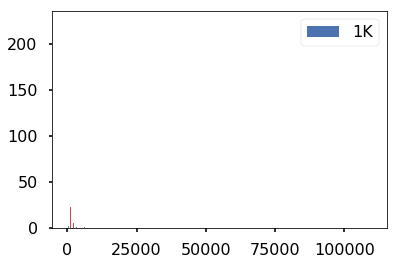

/Users/Cat/Library/Python/3.6/lib/python/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/Cat/Library/Python/3.6/lib/python/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


In [44]:
with plt.style.context('seaborn-deep'):
    plt.hist([one_k['count'][:10], ten_k['count'][:10], hundred_k['count']][:10], bins=500,  label='1K')
    plt.legend(loc='upper right')
    plt.show()

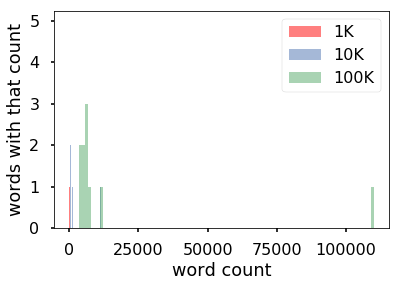

In [46]:
plt.hist(one_k['count'][:10],bins=100, alpha=0.5, label='1K', color='red')
plt.hist(ten_k['count'][:10],bins=100, alpha=0.5, label='10K')
plt.hist(hundred_k['count'][:10],bins=100, alpha=0.5, label='100K')
plt.legend(loc='upper right')
plt.ylabel("words with that count")
plt.xlabel("word count")
plt.show()

In [62]:
one_k = one_k.set_index('term')


In [65]:
one_k['normalized_ct'] = one_k['count']/one_k['count'].max().astype(np.float64)

In [71]:
ten_k = ten_k.set_index('term')
ten_k['normalized_ct'] = ten_k['count']/ten_k['count'].max().astype(np.float64)

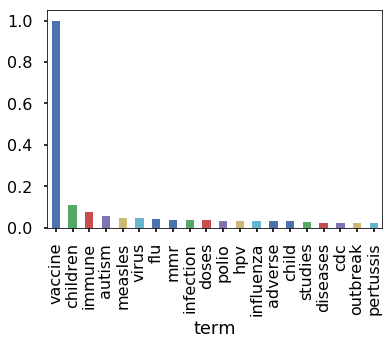

In [83]:
one_k['normalized_ct'][:20].plot(kind='bar')

In [94]:
combined = pandas.concat([one_k['normalized_ct'][:20],
               ten_k['normalized_ct'][:20]],
              names=['one_k', 'ten_k'],
              axis=1)


In [96]:
combined.columns = ['one_k','ten_k']

Text(0,0.5,'Normalized counts')

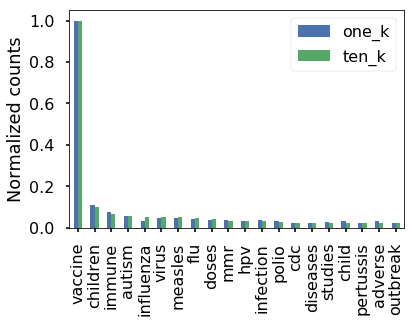

In [99]:
combined.sort_values('ten_k',ascending=False).plot(kind='bar')
plt.ylabel('Normalized counts')

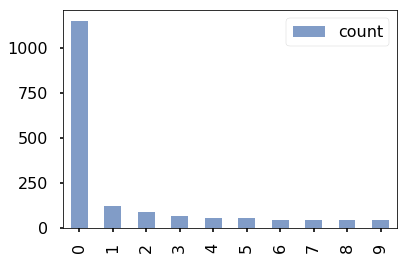

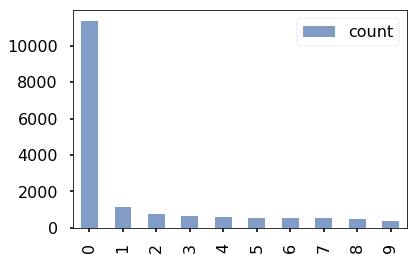

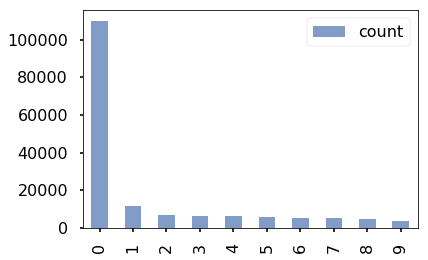

In [51]:
one_k[['term','count']][:10].plot(kind='bar',legend=True,label='1K', alpha=0.7) 
ten_k[['term','count']][:10].plot(kind='bar',legend=True, label='10K', alpha=0.7)
hundred_k[['term','count']][:10].plot(kind='bar',legend=True, label='100K', alpha=0.7)


In [39]:
one_k.head()

,Unnamed: 0,count,stem,term
0,0,1151,vaccin,vaccine
1,1,123,children,children
2,2,89,immun,immune
3,3,64,autism,autism
4,4,54,measl,measles


In [6]:
one_k = pandas.read_csv(glob.glob(topics[-1] + '/1000/*')[0])

In [7]:
ten_k = pandas.read_csv(glob.glob(topics[-1] + '/10000/*')[0])

In [8]:
hundred_k = pandas.read_csv(glob.glob(topics[-1] + '/100000/*')[0])

In [22]:
one_k.sort_values('count', ascending=False)[:100]

,Unnamed: 0,count,stem,term
0,0,1151,vaccin,vaccine
1,1,123,children,children
2,2,89,immun,immune
3,3,64,autism,autism
4,4,54,measl,measles
5,5,53,virus,virus
6,6,46,flu,flu
7,7,43,mmr,mmr
8,8,43,infect,infection
9,9,42,dose,doses


In [8]:
glob.glob(topics[0] + '/1000/*')

['../data/sampling/climate_change/1000/sample0.csv',
 '../data/sampling/climate_change/1000/sample1.csv',
 '../data/sampling/climate_change/1000/sample2.csv',
 '../data/sampling/climate_change/1000/sample3.csv',
 '../data/sampling/climate_change/1000/sample4.csv',
 '../data/sampling/climate_change/1000/sample5.csv',
 '../data/sampling/climate_change/1000/sample6.csv',
 '../data/sampling/climate_change/1000/sample7.csv',
 '../data/sampling/climate_change/1000/sample8.csv',
 '../data/sampling/climate_change/1000/sample9.csv']

### 1)  Immigration topic

In [ ]:
q = '+(immigra* OR migrat* OR migrant*) AND +(US OR "united states") and timespans_id:93598'

In [ ]:
start = time.time()

for N in [1000, 10000, 100000]:
    print("\n\n","N",N)
    for m in range(100):
        print("SAMPLE: ", str(m))
        start_s = time.time()
        sample = mc.wordCount(q, sample_size=N)
        print("TIME FOR API: ", str(time.time() - start_s), " SEC")
        path = '../data/sampling/immigration/'+ str(N) + "/sample" + str(m) + ".csv"
        print(path)
        pandas.read_json(json.dumps(sample), orient='records').to_csv(path)
        
print("TOTAL TIME FOR TOPIC: ", time.time() - start)

In [ ]:
print(54)

In [ ]:
one_k = mc.wordCount('+(immigra* OR migrat* OR migrant*) AND +(US OR "united states") and timespans_id:93598', sample_size=1000)

In [ ]:
ten_k = mc.wordCount('+(immigra* OR migrat* OR migrant*) AND +(US OR "united states") and timespans_id:93598', sample_size=10000)

In [ ]:
hundred_k = mc.wordCount('+(immigra* OR migrat* OR migrant*) AND +(US OR "united states") and timespans_id:93598', sample_size=100000)

In [ ]:
print(len(one_k))
print(len(ten_k))
print(len(hundred_k))

In [ ]:
sns.distplot(list(pandas.read_json(json.dumps(one_k), orient='records').head(100)['count']))

### 2) ebola


In [ ]:
len(mc.wordCount('ebola and timespans_id:150307', sample_size=1000)  )